In [3]:
# API KEY를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv

# API KEY 정보로드
load_dotenv()

True

In [4]:
# LangSmith 추적을 설정합니다. https://smith.langchain.com
# .env 파일에 LANGCHAIN_API_KEY를 입력합니다.
# !pip install -qU langchain-teddynote
from langchain_teddynote import logging

# 프로젝트 이름을 입력합니다.
logging.langsmith("CH01-Basic")

LangSmith 추적을 시작합니다.
[프로젝트명]
CH01-Basic


## ChatOpenAI

OpenAI 사의 채팅 전용 Large Language Model(llm) 입니다.

객체를 생성할 때 다음을 옵션 값을 지정할 수 있습니다. 옵션에 대한 상세 설명은 다음과 같습니다.

`temperature`

- 사용할 샘플링 온도는 0과 2 사이에서 선택합니다. 0.8과 같은 높은 값은 출력을 더 무작위하게 만들고, 0.2와 같은 낮은 값은 출력을 더 집중되고 결정론적으로 만듭니다.

`max_tokens`

- 채팅 완성에서 생성할 토큰의 최대 개수입니다.

`model_name`: 적용 가능한 모델 리스트

| 모델 계열       | 모델명 (API Name) | 입력       | 컨텍스트 윈도우  | 최대 출력 토큰 | 지식 마감일 (Cutoff) | 가격                  |
| :---------- | :------------- | :------- | :-------- | :------- | :-------------- | :------------------------------ |
| **GPT-5**   | `gpt-5`        | 텍스트, 이미지 | 400,000   | 128,000  | 2024년 9월 30일    | **입력:** $1.25<br>**출력:** $10.00 |
|             | `gpt-5-mini`   | 텍스트, 이미지 | 400,000   | 128,000  | 2024년 5월 31일    | **입력:** $0.25<br>**출력:** $2.00  |
|             | `gpt-5-nano`   | 텍스트, 이미지 | 400,000   | 128,000  | 2024년 5월 31일    | **입력:** $0.05<br>**출력:** $0.40  |
| **GPT-4.1** | `gpt-4.1`      | 텍스트, 이미지 | 1,047,576 | 32,768   | 2024년 6월 1일     | **입력:** $2.00<br>**출력:** $8.00  |
|             | `gpt-4.1-mini` | 텍스트, 이미지 | 1,047,576 | 32,768   | 2024년 6월 1일     | **입력:** $0.40<br>**출력:** $1.60  |
|             | `gpt-4.1-nano` | 텍스트, 이미지 | 1,047,576 | 32,768   | 2024년 6월 1일     | **입력:** $0.10<br>**출력:** $0.40  |
| **GPT-4o**  | `gpt-4o`       | 텍스트, 이미지 | 128,000   | 16,384   | 2023년 10월 1일    | **입력:** $2.50<br>**출력:** $10.00 |
|             | `gpt-4o-mini`  | 텍스트, 이미지 | 128,000   | 16,384   | 2023년 10월 1일    | **입력:** $0.15<br>**출력:** $0.60  |

![gpt-models.png](./images/gpt-models3-202508.png)

- 링크: https://platform.openai.com/docs/models

In [5]:
from langchain_openai import ChatOpenAI

# 객체 생성
llm = ChatOpenAI(
    temperature=0.1,  # 창의성 (0.0 ~ 2.0)
    model_name="gpt-4.1-nano",  # 모델명
)

# 질의내용
question = "대한민국의 수도는 어디인가요?"

# 질의
print(f"[답변]: {llm.invoke(question)}")

c:\Users\jeongseunghyun\AppData\Local\pypoetry\Cache\virtualenvs\langchain-kr-NQ-W-e1F-py3.11\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[답변]: content='대한민국의 수도는 서울입니다.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 16, 'total_tokens': 24, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_f0bc439dc3', 'id': 'chatcmpl-Co0dgDyLoTZxrbzhzW3x3ZNIy3bK5', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None} id='run--81e67f48-7c44-4d8d-9026-499b5820c17d-0' usage_metadata={'input_tokens': 16, 'output_tokens': 8, 'total_tokens': 24, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


### 답변의 형식(AI Message)

In [6]:
# 질의내용
question = "대한민국의 수도는 어디인가요?"

# 질의
response = llm.invoke(question)

In [7]:
response

AIMessage(content='대한민국의 수도는 서울입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 16, 'total_tokens': 24, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_f0bc439dc3', 'id': 'chatcmpl-Co0dwJd3M9enP7lRsbUIyS7617wAP', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--9afa0e57-d1db-462f-8c27-1e6f7186378e-0', usage_metadata={'input_tokens': 16, 'output_tokens': 8, 'total_tokens': 24, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [8]:
response.content

'대한민국의 수도는 서울입니다.'

In [9]:
response.response_metadata

{'token_usage': {'completion_tokens': 8,
  'prompt_tokens': 16,
  'total_tokens': 24,
  'completion_tokens_details': {'accepted_prediction_tokens': 0,
   'audio_tokens': 0,
   'reasoning_tokens': 0,
   'rejected_prediction_tokens': 0},
  'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
 'model_name': 'gpt-4.1-nano-2025-04-14',
 'system_fingerprint': 'fp_f0bc439dc3',
 'id': 'chatcmpl-Co0dwJd3M9enP7lRsbUIyS7617wAP',
 'service_tier': 'default',
 'finish_reason': 'stop',
 'logprobs': None}

### LogProb 활성화

주어진 텍스트에 대한 모델의 **토큰 확률의 로그 값** 을 의미합니다. 토큰이란 문장을 구성하는 개별 단어나 문자 등의 요소를 의미하고, 확률은 **모델이 그 토큰을 예측할 확률**을 나타냅니다.

In [ ]:
# 객체 생성
llm_with_logprob = ChatOpenAI(
    temperature=0.1,  # 창의성 (0.0 ~ 2.0)
    max_tokens=2048,  # 최대 토큰수
    model_name="gpt-4.1-nano",  # 모델명
).bind(logprobs=True)

In [ ]:
# 질의내용
question = "대한민국의 수도는 어디인가요?"

# 질의
response = llm_with_logprob.invoke(question)

In [ ]:
# 결과 출력
response.response_metadata

### 스트리밍 출력

스트리밍 옵션은 질의에 대한 답변을 실시간으로 받을 때 유용합니다.

In [10]:
# 스트림 방식으로 질의
# answer 에 스트리밍 답변의 결과를 받습니다.
answer = llm.stream("대한민국의 아름다운 관광지 10곳과 주소를 알려주세요!")

In [11]:
# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
for token in answer:
    print(token.content, end="", flush=True)

물론입니다! 대한민국의 아름다운 관광지 10곳과 그 주소를 소개해 드리겠습니다.

1. 경복궁 (Gyeongbokgung Palace)  
서울특별시 종로구 사직로 161

2. 제주도 한라산 국립공원 (Hallasan National Park, Jeju Island)  
제주특별자치도 제주시 특별자치도 제주시 조천읍 남원리 산 1-1

3. 부산 해운대 해수욕장 (Haeundae Beach, Busan)  
부산광역시 해운대구 해운대해변로 264

4. 강원도 설악산 국립공원 (Seoraksan National Park)  
강원도 속초시 설악산로 833

5. 경상남도 통영 한산도 (Tongyeong Hansando)  
경상남도 통영시 한산면 죽림리 한산도

6. 전라남도 순천만 습지 (Suncheon Bay Wetland Reserve)  
전라남도 순천시 순천만길 251

7. 경상북도 경주 불국사 (Bulguksa Temple, Gyeongju)  
경상북도 경주시 불국로 385

8. 충청남도 태안 안면도 (Anmyeondo Island, Taean)  
충청남도 태안군 안면읍 승언리

9. 전라북도 무주 덕유산 (Deogyusan Mountain, Muju)  
전라북도 무주군 무주읍 덕유로 1

10. 서울 남산서울타워 (Namsan Seoul Tower)  
서울특별시 용산구 남산공원길 105

이 외에도 대한민국에는 아름다운 곳이 많지만, 위의 장소들은 대표적이고 인기 있는 관광지입니다. 방문 계획에 참고하시기 바랍니다!

In [ ]:
from langchain_teddynote.messages import stream_response

# 스트림 방식으로 질의
# answer 에 스트리밍 답변의 결과를 받습니다.
answer = llm.stream("대한민국의 아름다운 관광지 10곳과 주소를 알려주세요!")
stream_response(answer)

## 프롬프트 캐싱

- 참고 링크: https://platform.openai.com/docs/guides/prompt-caching

프롬프트 캐싱 기능을 활용하면 반복하여 동일하게 입력으로 들어가는 토큰에 대한 비용을 아낄 수 있습니다.

다만, 캐싱에 활용할 토큰은 고정된 PREFIX 를 주는 것이 권장됩니다.

아래의 예시에서는 `<PROMPT_CACHING>` 부분에 고정된 토큰을 주어 캐싱을 활용하는 방법을 설명합니다.

In [ ]:
from langchain_teddynote.messages import stream_response

very_long_prompt = """
당신은 매우 친절한 AI 어시스턴트 입니다. 
당신의 임무는 주어진 질문에 대해 친절하게 답변하는 것입니다.
아래는 사용자의 질문에 답변할 때 참고할 수 있는 정보입니다.
주어진 정보를 참고하여 답변해 주세요.

<WANT_TO_CACHE_HERE>
#참고:
**Prompt Caching**
Model prompts often contain repetitive content, like system prompts and common instructions. OpenAI routes API requests to servers that recently processed the same prompt, making it cheaper and faster than processing a prompt from scratch. This can reduce latency by up to 80% and cost by 50% for long prompts. Prompt Caching works automatically on all your API requests (no code changes required) and has no additional fees associated with it.

Prompt Caching is enabled for the following models:

gpt-4.1 (excludes gpt-4.1-2024-05-13 and chatgpt-4.1-latest)
gpt-4.1-mini
o1-preview
o1-mini
This guide describes how prompt caching works in detail, so that you can optimize your prompts for lower latency and cost.

Structuring prompts
Cache hits are only possible for exact prefix matches within a prompt. To realize caching benefits, place static content like instructions and examples at the beginning of your prompt, and put variable content, such as user-specific information, at the end. This also applies to images and tools, which must be identical between requests.

How it works
Caching is enabled automatically for prompts that are 1024 tokens or longer. When you make an API request, the following steps occur:

Cache Lookup: The system checks if the initial portion (prefix) of your prompt is stored in the cache.
Cache Hit: If a matching prefix is found, the system uses the cached result. This significantly decreases latency and reduces costs.
Cache Miss: If no matching prefix is found, the system processes your full prompt. After processing, the prefix of your prompt is cached for future requests.
Cached prefixes generally remain active for 5 to 10 minutes of inactivity. However, during off-peak periods, caches may persist for up to one hour.

Requirements
Caching is available for prompts containing 1024 tokens or more, with cache hits occurring in increments of 128 tokens. Therefore, the number of cached tokens in a request will always fall within the following sequence: 1024, 1152, 1280, 1408, and so on, depending on the prompt's length.

All requests, including those with fewer than 1024 tokens, will display a cached_tokens field of the usage.prompt_tokens_details chat completions object indicating how many of the prompt tokens were a cache hit. For requests under 1024 tokens, cached_tokens will be zero.

What can be cached
Messages: The complete messages array, encompassing system, user, and assistant interactions.
Images: Images included in user messages, either as links or as base64-encoded data, as well as multiple images can be sent. Ensure the detail parameter is set identically, as it impacts image tokenization.
Tool use: Both the messages array and the list of available tools can be cached, contributing to the minimum 1024 token requirement.
Structured outputs: The structured output schema serves as a prefix to the system message and can be cached.
Best practices
Structure prompts with static or repeated content at the beginning and dynamic content at the end.
Monitor metrics such as cache hit rates, latency, and the percentage of tokens cached to optimize your prompt and caching strategy.
To increase cache hits, use longer prompts and make API requests during off-peak hours, as cache evictions are more frequent during peak times.
Prompts that haven't been used recently are automatically removed from the cache. To minimize evictions, maintain a consistent stream of requests with the same prompt prefix.
Frequently asked questions
How is data privacy maintained for caches?

Prompt caches are not shared between organizations. Only members of the same organization can access caches of identical prompts.

Does Prompt Caching affect output token generation or the final response of the API?

Prompt Caching does not influence the generation of output tokens or the final response provided by the API. Regardless of whether caching is used, the output generated will be identical. This is because only the prompt itself is cached, while the actual response is computed anew each time based on the cached prompt. 

Is there a way to manually clear the cache?

Manual cache clearing is not currently available. Prompts that have not been encountered recently are automatically cleared from the cache. Typical cache evictions occur after 5-10 minutes of inactivity, though sometimes lasting up to a maximum of one hour during off-peak periods.

Will I be expected to pay extra for writing to Prompt Caching?

No. Caching happens automatically, with no explicit action needed or extra cost paid to use the caching feature.

Do cached prompts contribute to TPM rate limits?

Yes, as caching does not affect rate limits.

Is discounting for Prompt Caching available on Scale Tier and the Batch API?

Discounting for Prompt Caching is not available on the Batch API but is available on Scale Tier. With Scale Tier, any tokens that are spilled over to the shared API will also be eligible for caching.

Does Prompt Caching work on Zero Data Retention requests?

Yes, Prompt Caching is compliant with existing Zero Data Retention policies.
</WANT_TO_CACHE_HERE>

#Question:
{}

"""

In [ ]:
from langchain.callbacks import get_openai_callback

with get_openai_callback() as cb:
    # 답변 요청
    answer = llm.invoke(
        very_long_prompt.format("프롬프트 캐싱 기능에 대해 2문장으로 설명하세요")
    )
    print(cb)
    # 캐싱된 토큰 출력
    cached_tokens = answer.response_metadata["token_usage"]["prompt_tokens_details"][
        "cached_tokens"
    ]
    print(f"캐싱된 토큰: {cached_tokens}")

In [ ]:
with get_openai_callback() as cb:
    # 답변 요청
    answer = llm.invoke(
        very_long_prompt.format("프롬프트 캐싱 기능에 대해 2문장으로 설명하세요")
    )
    print(cb)
    # 캐싱된 토큰 출력
    cached_tokens = answer.response_metadata["token_usage"]["prompt_tokens_details"][
        "cached_tokens"
    ]
    print(f"캐싱된 토큰: {cached_tokens}")

## 멀티모달 모델(이미지 인식)

멀티모달은 여러 가지 형태의 정보(모달)를 통합하여 처리하는 기술이나 접근 방식을 의미합니다. 이는 다음과 같은 다양한 데이터 유형을 포함할 수 있습니다.

- 텍스트: 문서, 책, 웹 페이지 등의 글자로 된 정보
- 이미지: 사진, 그래픽, 그림 등 시각적 정보
- 오디오: 음성, 음악, 소리 효과 등의 청각적 정보
- 비디오: 동영상 클립, 실시간 스트리밍 등 시각적 및 청각적 정보의 결합

`gpt-4.1` 모델은 이미지 인식 기능(Vision) 이 추가되어 있는 모델입니다.

In [12]:
from langchain_teddynote.models import MultiModal
from langchain_teddynote.messages import stream_response

# 객체 생성
llm = ChatOpenAI(
    temperature=0.1,  # 창의성 (0.0 ~ 2.0)
    model_name="gpt-4.1-nano",  # 모델명
)

# 멀티모달 객체 생성
multimodal_llm = MultiModal(llm)


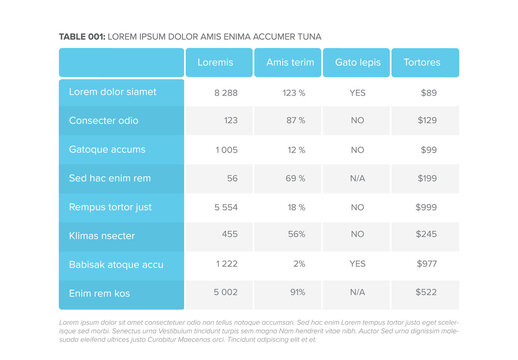

이 이미지는 표 형식으로 여러 데이터 항목들을 보여주고 있습니다. 표는 총 8개의 행과 5개의 열로 구성되어 있으며, 각 열은 제목과 관련된 데이터를 포함하고 있습니다. 

1. **첫 번째 열 (항목명)**: 각 행은 특정 항목 또는 문장을 나타내고 있습니다. 예를 들어, "Lorem dolor siamet", "Consecter odio", "Gatoque accums" 등입니다. 이 항목들은 실제 의미보다는 예시 또는 임의의 텍스트로 보입니다.

2. **두 번째 열 (숫자 값)**: 각 항목에 대응하는 숫자 값이 있습니다. 예를 들어, 8,288, 123, 1,005 등입니다. 이 값들은 어떤 수치 데이터를 나타내는 것으로 보입니다.

3. **세 번째 열 (백분율)**: 각 항목에 대한 백분율 값이 포함되어 있습니다. 예를 들어, 123% (이 값은 비현실적이지만 표상상 의미를 보여줍니다), 87%, 12% 등입니다.

4. **네 번째 열 (Gato lepis)**: 이 열은 "YES" 또는 "NO"로 표시되어 있으며, 특정 조건 또는 상태를 나타내는 것으로 보입니다. 예를 들어, "YES", "NO", "N/A" 등이 있습니다.

5. **다섯 번째 열 (Totores)**: 각 항목에 대한 금액 또는 비용을 나타내는 숫자가 있습니다. 예를 들어, $89, $129, $99 등입니다.

전체적으로 이 표는 가상의 데이터를 보여주며, 각 항목별로 수치, 백분율, 상태, 비용 등을 정리한 형식입니다. 표 하단에는 임의의 텍스트가 포함되어 있는데, 이는 표의 설명 또는 부가 설명으로 보입니다. 이 텍스트는 실제 의미보다는 예시용으로 작성된 것으로 보입니다.

In [15]:
# 샘플 이미지 주소(웹사이트로 부터 바로 인식)
IMAGE_URL = "https://t3.ftcdn.net/jpg/03/77/33/96/360_F_377339633_Rtv9I77sSmSNcev8bEcnVxTHrXB4nRJ5.jpg"

# 이미지 파일로 부터 질의
answer = multimodal_llm.stream(IMAGE_URL, system_prompt='한글로 답변해줘')
# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)


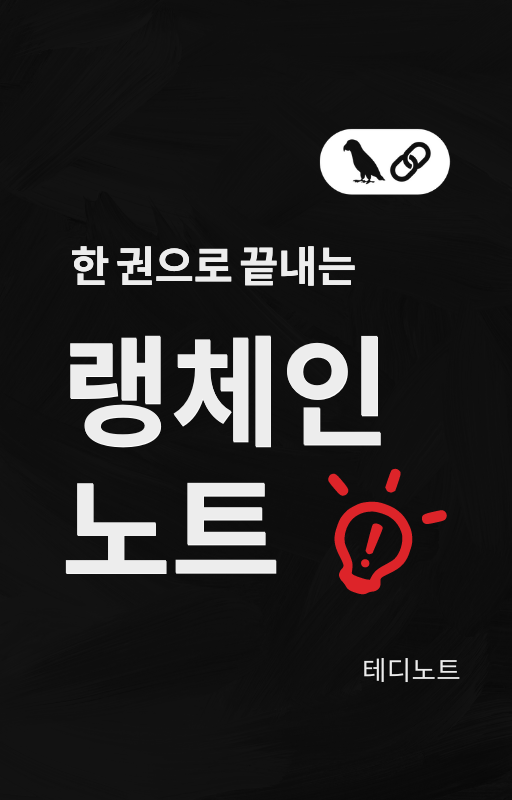

이 이미지는 "한 권으로 끝내는 랭체인 노트"라는 제목의 텍스트와 함께, 상단에 새와 링크 아이콘이 포함된 원형 아이콘이 있습니다. 이 아이콘은 아마도 '연결' 또는 '연계'를 상징하는 것으로 보입니다. 

전체 디자인은 검은 배경에 흰색 글씨로 되어 있어 시각적으로 강렬하며, "랭체인 노트"라는 제목은 아마도 특정 학습 또는 정리 노트의 이름일 가능성이 높습니다. "테디노트"라는 작은 텍스트는 이 노트의 제작자 또는 브랜드명을 나타내는 것으로 추측됩니다.

중요한 포인트는 이 노트가 '한 권으로 끝내는'이라는 표현으로, 하나의 책 또는 자료로 핵심 내용을 모두 정리하거나 학습할 수 있음을 암시합니다. 또한, 빨간색의 전구 아이콘은 아이디어, 창의성 또는 중요한 포인트를 강조하는 의미로 사용된 것으로 보입니다.

요약하자면, 이 이미지는 효율적이고 핵심적인 학습 또는 정리 자료인 '랭체인 노트'를 소개하는 표지 또는 홍보 이미지로 해석할 수 있습니다.

In [17]:
# 로컬 PC 에 저장되어 있는 이미지의 경로 입력
IMAGE_PATH_FROM_FILE = "../images/langchain-note.png"

# 이미지 파일로 부터 질의(스트림 방식)
answer = multimodal_llm.stream(IMAGE_PATH_FROM_FILE, system_prompt='한글로 답변해줘')
# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)

## System, User 프롬프트 수정

In [20]:
system_prompt = """당신은 표(재무제표) 를 해석하는 금융 AI 어시스턴트 입니다. 
당신의 임무는 주어진 테이블 형식의 재무제표를 바탕으로 흥미로운 사실을 정리하여 친절하게 답변하는 것입니다."""

user_prompt = """당신에게 주어진 표는 회사의 재무제표 입니다. 흥미로운 사실을 정리하여 답변하세요."""

# 멀티모달 객체 생성
multimodal_llm_with_prompt = MultiModal(
    llm, system_prompt=system_prompt, user_prompt=user_prompt
)


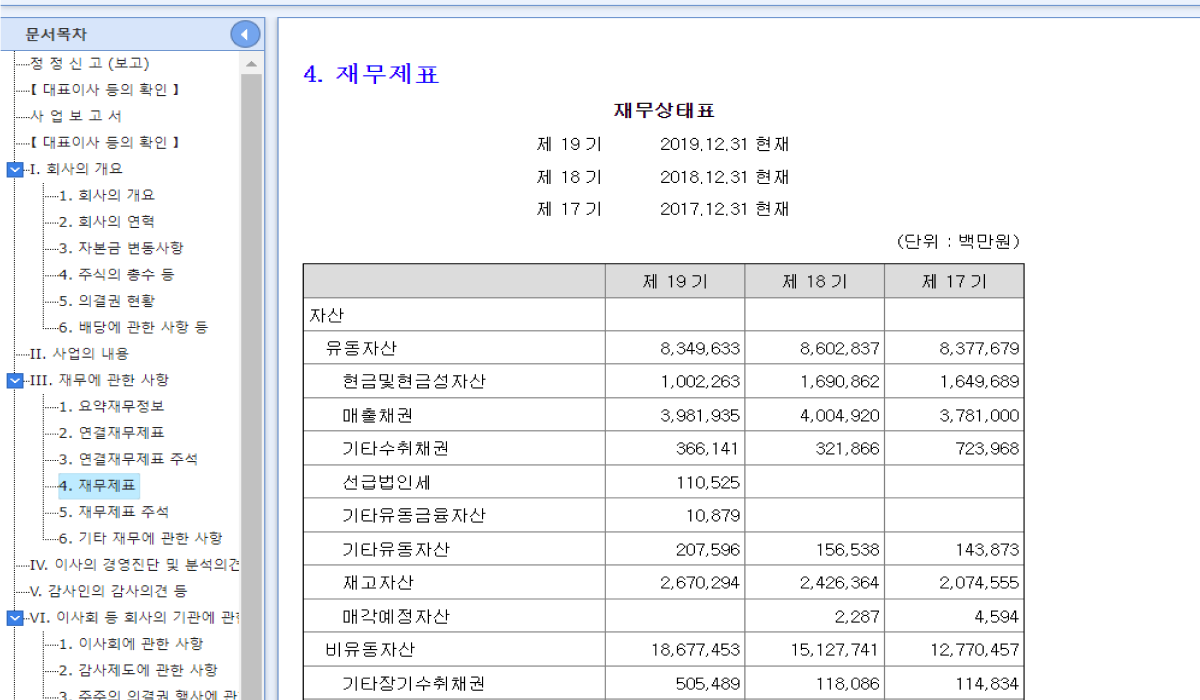

이 재무제표를 살펴보면, 회사의 자산 규모가 꾸준히 증가하고 있음을 알 수 있습니다. 특히, 유동자산은 2017년 8,377,679백만원에서 2018년 8,602,837백만원, 2019년 8,349,633백만원으로 변화하며 안정적인 수준을 유지하고 있습니다.

또한, 비유동자산도 2017년 12,770,457백만원에서 2018년 15,127,741백만원, 2019년 18,677,453백만원으로 지속적으로 증가하고 있어, 회사가 장기적인 자산 투자와 확장에 힘쓰고 있음을 보여줍니다.

특히, '기타유동금융자산'과 '기타유동자산'이 각각 증가하는 추세를 보이고 있으며, 이는 회사의 유동성 확보와 재무 안정성을 높이기 위한 전략으로 해석할 수 있습니다.

이와 함께, '선급법인세'와 '매각예정자산' 등 일부 항목은 변동이 크지 않거나 감소하는 모습을 보여, 재무구조의 안정성을 유지하려는 노력이 엿보입니다.

전반적으로, 회사는 자산 규모를 확대하며 재무구조를 안정적으로 유지하고 있어, 앞으로도 지속적인 성장 가능성을 기대할 수 있습니다.

In [21]:
# 로컬 PC 에 저장되어 있는 이미지의 경로 입력
IMAGE_PATH_FROM_FILE = "https://storage.googleapis.com/static.fastcampus.co.kr/prod/uploads/202212/080345-661/kwon-01.png"

# 이미지 파일로 부터 질의(스트림 방식)
answer = multimodal_llm_with_prompt.stream(IMAGE_PATH_FROM_FILE)

# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)